___
# `Статистика`
___
## <h2 id='cont' style='color:lightblue'>Содержание</h2a>
- [Меры центральной тенденции](#metr)  
   - Межквартильный размах
   - Выбросы
   - Ассиметрия
   - Эксцесс
- [Выборочная и генеральная совокупность](#gen)
   - Объем выборки
   - Доверительный интервал
- [Тестирование гипотез](#h)
   - Гипотеза о нормальности распределения
   - Гипотеза о равенстве дисперсий
   - Гипотеза о равенстве средних
   - Гипотеза о корреляции данных



___
## <h2 id='metr' style='color:violet'>Импорт библиотек и датасета</h2>
___
___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
df = pd.read_csv('data\consumption.csv')
display(df.head(2))
data = pd.read_csv('data\students_performance.csv ')
display(data.head(2))


,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


___
## <h2 id='metr' style='color:violet'>Меры центральной тенденции</h2>
___
___

- ### `Межквартильный размах` (IQR)  

### $IQR = x_{0.75} - x_{0.25}$

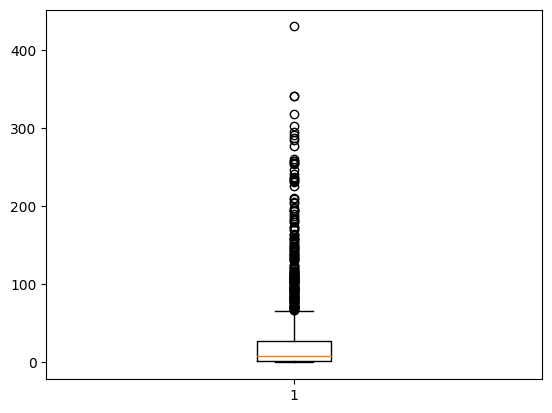

In [3]:
iqr = df['consumption'].quantile(0.75) - df['consumption'].quantile(0.25)
iqr

plt.boxplot(df['consumption'])
plt.show()


___
- ### `Выбросы`  
### $X_{outliner} = \{ x_{0.25} - 1.5 \cdot IQR; x_{0.75} + 1.5 \cdot IQR \}$

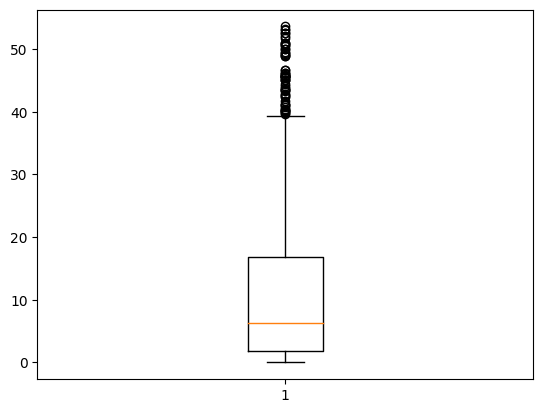

In [4]:
low_outliner = df['consumption'].quantile(0.25) - iqr
high_outliner = df['consumption'].quantile(0.75) + iqr
df_whithout_outliner = df[ (df['consumption'] > low_outliner) & (df['consumption'] < high_outliner) ]
plt.boxplot(df_whithout_outliner['consumption'])
plt.show()


___
- ### `Асимметрия`  

Отклонение хвостов влево (-) или вправо(+) от идеальной модели нормального распределения.  

### $ a_s = \frac {\sum(x_i - x_{mean})^3}{\sigma^3} $


In [5]:
a_s = df_whithout_outliner['consumption'].skew()
a_s


1.3717970059594626

___
- ### `Эксцесс`  
Отклонение вершины вверх (+) или вниз(-) от идеальной модели нормального распределения.  


### $ e_s = \frac {\sum(x_i - x_{mean})^4}{\sigma^4}-3 $

In [6]:
e_s = df_whithout_outliner['consumption'].kurtosis()
e_s


1.1119262322672498

C:\Users\nazar\AppData\Local\Temp\ipykernel_22140\1069220354.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_whithout_outliner['stded_cons'] = (df_whithout_outliner['consumption'] - df_whithout_outliner['consumption'].mean())/df_whithout_outliner['consumption'].std()


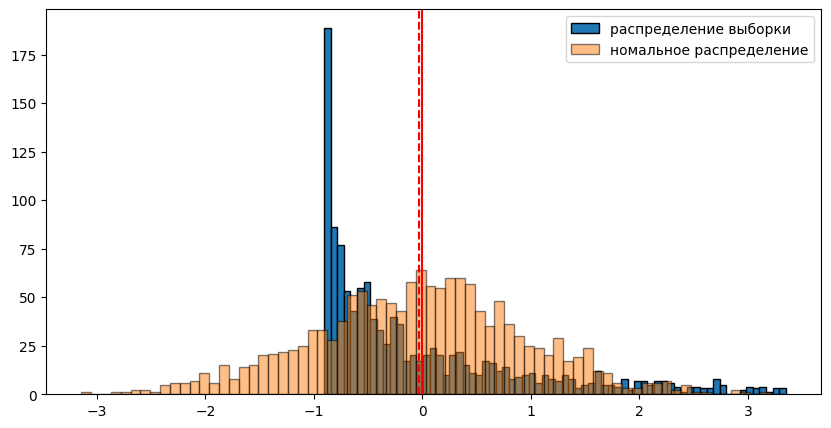

1.3717970059594629

In [7]:
df_whithout_outliner['stded_cons'] = (df_whithout_outliner['consumption'] - df_whithout_outliner['consumption'].mean())/df_whithout_outliner['consumption'].std()
df_whithout_outliner
fig = plt.figure(figsize=(10,5))
plt.hist(df_whithout_outliner['stded_cons'], bins=70, edgecolor='black', label='распределение выборки')

norm_arr = np.random.normal(size=1460)
plt.hist(norm_arr, bins=70, alpha=0.5, edgecolor='black',label='номальное распределение')

plt.axvline(df_whithout_outliner['stded_cons'].mean(), c='r')
plt.axvline(norm_arr.mean(), c='r', linestyle='--', )
plt.legend()
plt.show()

a_s = df_whithout_outliner['stded_cons'].skew()
a_s


___
## <h2 id='gen' style='color:violet'>Выборка и генереальная совокупность</h2>
___
___

### Формула расчета `необходимого объема выборки`  

### $ n = \frac{Z^2 \cdot p \cdot q}{\triangle^2} $
- $Z$ :  коэффициент, зависящий от доверительного уровня
- $p$ : доля респондентов с наличием целевого признака
- $q$ : доля респондентов без целевого признака
- $\triangle$ : предельная ошибка выборки

In [8]:
confidence_level = 0.95
Z = st.norm.ppf(confidence_level + (1 - confidence_level)/2)
p =0.5
q = 0.5
delta = 0.04
print(f'Необходимое количество элементов в выборке: {((Z**2)*p*q)/delta**2}')


Необходимое количество элементов в выборке: 600.2279407334571


___
- ### `Доверительный интервал для среднего`
Интервал, в котором находится среднее значение генеральной совокупности с заданной точностью.  
`НАДЕЖНОСТЬ` (`статистическая значимость`= 1 - `НАДЕЖНОСТЬ`) - вероятность того, что среднее значение генеральной совокупности лежит в доверительном интервале (чем ближе к 1, тем выше точность оценки)  

- Выборка `< 30 наблюдений`:

### $ CI_{mean} = \{\mu - \frac {t\cdot \sigma}{\sqrt {n}} ; \mu + \frac {t\cdot \sigma}{\sqrt {n}}\}$, $t$ - коэффициент Стьюдента


In [9]:
alpha = 0.90
freedom_degree = len(df['consumption'].loc[:29])-1
df_mean = df['consumption'].loc[:29].mean()

CI = st.t.interval(confidence=alpha, df=freedom_degree , loc=df_mean, scale=st.sem(df['consumption']))
CI


(44.93123157777254, 49.4081017555608)

- Выборка `> 30 наблюдений`:

### $ CI_{mean} = \{\mu - \frac {z\cdot \sigma}{\sqrt {n}} ; \mu + \frac {z\cdot \sigma}{\sqrt {n}}\}$ , $z$ - коэффициент нормального распределения

In [10]:
alpha = 0.90
df_mean = df['consumption'].mean()

CI = st.norm.interval(confidence=alpha, loc=df_mean, scale=st.sem(df['consumption']))
CI


(25.943470446434564, 30.277340742376634)

___
## <h2 id='h' style='color:violet'>Тестирование гипотез</h2>
___
___
`p-value` -  вероятность, что полученное оценочное значение относится к $H_0$.  

Если `p-value >` уровня значимости - $H_0$ не отвергается  
Если `p-value <` уровня значимости - $H_0$ отвергается   

___
### Гипотеза о `нормальности распределения`
- $H_0 :$ распределение выборки нормальное
- $H_1 :$ распределение выборки ненормальное
___
Параметры теста **Шапиро-Уиллока**
- pvalue : вероятность, что данные выборки распределены нормально
- stats : стремится к 1 при нормальном распределениии данных выборки


In [11]:
from scipy.stats import shapiro

significance_level = 0.05

stats, pvalue = shapiro(df['consumption'])
if pvalue > significance_level:
    print(f'Распределение данных выборки нормальное')
elif pvalue < significance_level:
    print(f'Распределение данных выборки ненормальное')


Распределение данных выборки ненормальное


___
### Гипотеза о `равенстве дисперсий`
- $H_0 :$ дисперсии обеих выборок одинаковы
- $H_1 :$ дисперсии обеих выборок различны
___
Параметры теста **Левена**
- pvalue : вероятность, что дисперсии для обеих выборок одинаковы
- stats : стремится к 1 при больших различиях дисперсий

In [12]:
from scipy.stats import levene

selection_1 = df['consumption'].iloc[:len(df['consumption'])//2]
selection_2 = df['consumption'].iloc[len(df['consumption'])//2 :]
significance_level = 0.05

stats, pvalue = levene(selection_1, selection_2, center='mean')
if pvalue > significance_level:
    print(f'Дисперсии обеих выборок одинаковы, p-value:{pvalue}')
elif pvalue < significance_level:
    print(f'Дисперсии обеих выборок различны , p-value:{pvalue:.3f}, stats={stats:.2f}')


Дисперсии обеих выборок различны , p-value:0.000, stats=74.69


___
### Гипотеза о `равенстве средних`

- $H_0 :$ средние обеих выборок одинаковы
- $H_1 :$ средние обеих выборок различны
___
Условия примененеия **Т-теста Стьюдента**:
- Данные обеих выборок `независимы`
- Обе выборки имеют близкое к нормальному распределению
- Дисперсии одинаковы для обеих выборок  

Параметры **Т-теста Стьюдента**
- pvalue : вероятность, что средние для обеих выборок одинаковы

65.714 66.464


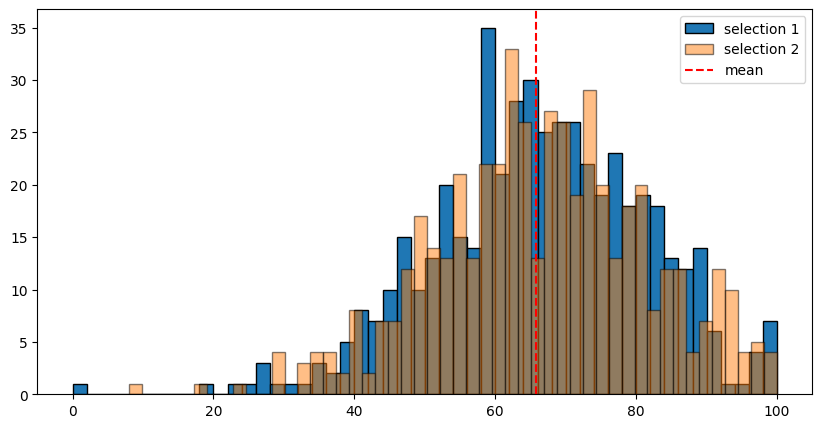

In [13]:
selection_1 = data['math score'].iloc[: len(data['math score'])// 2]
selection_2 = data['math score'].iloc[len(data['math score'])// 2: ]

s1_mean = selection_1.mean()
s2_mean = selection_2.mean()
print(s1_mean, s2_mean)

plt.figure(figsize=(10,5))
plt.hist(selection_1, bins=50, edgecolor='black', label='selection 1')
plt.hist(selection_2, bins=50, edgecolor='black', alpha=0.5, label='selection 2')
plt.axvline(s1_mean, linestyle='--', c='r', label='mean')
plt.legend();


- Проверка на нормальность распределений выборок

In [14]:
from scipy.stats import shapiro

alpha = 0.05
stats, pvalue = shapiro(selection_1)
if pvalue > alpha:
    print('У Selection 1 Распределение не нормальное!')
elif pvalue < alpha:
    print('У Selection 1 Распределение нормальное !')

alpha = 0.05
stats, pvalue = shapiro(selection_2)
if pvalue > alpha:
    print('У Selection 2 Распределение не нормальное!')
elif pvalue < alpha:
    print('У Selection 2 Распределение нормальное !')


У Selection 1 Распределение нормальное !
У Selection 2 Распределение нормальное !


- Проверка на равенство дисперсий выборок

In [15]:
from scipy.stats import levene

alpha = 0.05
stats, pvalue = levene(selection_1, selection_2)
if pvalue > alpha:
    print('У выборок дисперсии равны!')
elif pvalue < alpha:
    print('У выборок дисперсии не равны!')


У выборок дисперсии равны!


- Т-тест Стьюдента

In [16]:
from scipy.stats import ttest_ind

alpha = 0.05
stats, pvalue = ttest_ind(selection_1, selection_2)
if pvalue > alpha:
    print(f'У выборок средние равны!, p-value={pvalue:.3f}')
elif pvalue < alpha:
    print(f'У выборок средние не равны!, p-value={pvalue}')


У выборок средние равны!, p-value=0.434


___
Условия применения **Парного т-теста Стьюдента**:
- Данные обеих выборок - одни и те же элементы выборки до и после измененений
- Обе выборки имеют близкое к нормальному распределению
- Дисперсии одинаковы для обеих выборок  

Параметры **Парного т-теста Стьюдента**
- pvalue : вероятность, что средние для обеих выборок одинаковы

In [17]:
from scipy.stats import ttest_rel

func = lambda x: np.random.randint(-50,50,size=len(selection_1))+x
selection_2 = func(selection_1)

mean_s1 = selection_1.mean()
mean_s2 = selection_2.mean()
print(mean_s1, mean_s2)

alpha = 0.05
stats, pvalue = ttest_rel(selection_2, selection_1)

if pvalue > alpha:
    print(f'Средние выборок равны, p-value={pvalue}')
elif pvalue < alpha:
    print(f'Средние выборок не равны, p-value={pvalue}')
ttest_rel(selection_2, selection_1)


65.714 64.68
Средние выборок равны, p-value=0.4221457388151748


TtestResult(statistic=-0.8033659719119332, pvalue=0.4221457388151748, df=499)

___
Условия применения **теста Манна-Уиттни**:
- Данные обеих выборок независимы
- У выборок `не нормальное` распределение
- Дисперсии `не одинаковы` для обеих выборок  

Параметры **теста Манна-Уиттни**
- pvalue : вероятность, что средние для обеих выборок одинаковы

In [18]:
from scipy.stats import mannwhitneyu

sel_1 = df['consumption'].iloc[:len(df['consumption'])//2]
sel_2 = df['consumption'].iloc[len(df['consumption'])//2 :]

stats, pvalue = mannwhitneyu(sel_1, sel_2)
if pvalue > alpha:
    print(f'У выборок средние равны!, p-value={pvalue:.3f}')
elif pvalue < alpha:
    print(f'У выборок средние не равны!, p-value={pvalue:.3f}')


У выборок средние не равны!, p-value=0.000


___
### Гипотеза о `корреляции данных`

- $H_0 :$ данные выборок независимы
- $H_1 :$ данные выборок зависимы
___
Условия примененеия **теста Пирсона**:

- Обе выборки имеют близкое к `нормальному распределению`
- `Дисперсии одинаковы` для обеих выборок  

Параметры **теста Пирсона**
- pvalue : вероятность, что данные выборок независимы

Данные выборок зависимы, p-value=2.7098714379643378e-08


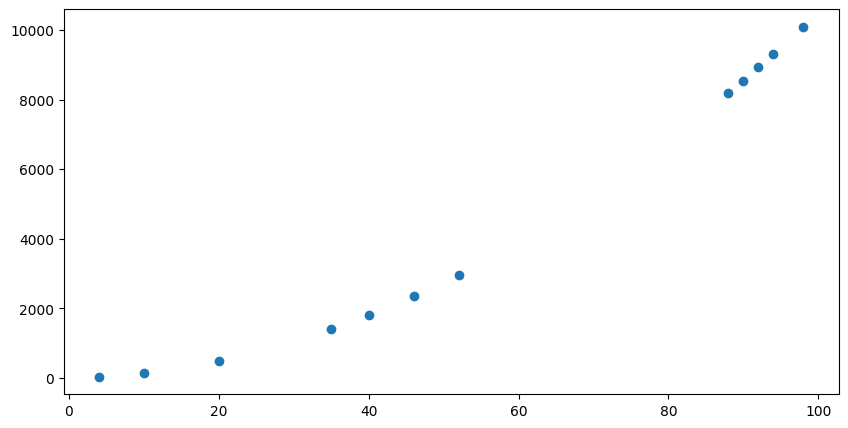

In [19]:
from scipy.stats import pearsonr

x = np.array([46, 92, 40, 88, 94, 20, 10, 4, 98, 52, 35, 90])
func = lambda x: (x**2)+x*5
y = func(x)
plt.figure(figsize=(10,5))
plt.scatter(x,y)

alpha = 0.05
stats, pvalue = pearsonr(x,y)
if pvalue > alpha:
    print(f'Данные выборок независимы, p-value={pvalue}')
elif pvalue < alpha:
    print(f'Данные выборок зависимы, p-value={pvalue}')


___
Условия примененеия **теста Спирмана**:

- Распределение обеих выборок `не известно`
- `Не известна` равна ли дисперсия обеих выборок

Параметры **теста Пирсона**
- pvalue : вероятность, что данные выборок независимы

In [20]:
from scipy.stats import spearmanr

stats, pvalue = spearmanr(x,y)
if pvalue > alpha:
    print(f'Данные выборок независимы, p-value={pvalue}')
elif pvalue < alpha:
    print(f'Данные выборок зависимы, p-value={pvalue}')


Данные выборок зависимы, p-value=0.0


___
## [Содержание](#cont)